In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('E:\internship chainsys\IPL_Dataset(2008-2024) (1).csv')

In [3]:
dataframe.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [4]:
df = dataframe.drop(columns=['Match_ID','Date'],axis=1)

In [5]:
active_teams = [
    'Royal Challengers Bengaluru',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Mumbai Indians',
    'Punjab Kings',
    'Kolkata Knight Riders',
    'Delhi Capitals',
    'Sunrisers Hyderabad',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

renamed_teams = {
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Royal Challengers Bengaluru': 'Royal Challengers Bengaluru',
    'Chennai Super Kings': 'Chennai Super Kings',
    'Rajasthan Royals': 'Rajasthan Royals',
    'Mumbai Indians': 'Mumbai Indians',
    'Kings XI Punjab': 'Punjab Kings',
    'Punjab Kings': 'Punjab Kings',
    'Kolkata Knight Riders': 'Kolkata Knight Riders',
    'Delhi Daredevils': 'Delhi Capitals',
    'Delhi Capitals': 'Delhi Capitals',
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad',
    'Gujarat Titans': 'Gujarat Titans',
    'Lucknow Super Giants': 'Lucknow Super Giants'

}

In [6]:
exit_teams = [
    "Deccan Chargers",
    "Kochi Tuskers Kerala",
    "Pune Warriors",
    "Gujarat Lions",
    "Rising Pune Supergiants",
    "Rising Pune Supergiant",
]

In [7]:
def rename_teams(team_name):

  if team_name is None:
    return None
  teams_name = team_name.split('vs')
  if len(teams_name) !=2:
    return None
  team_1 = teams_name[0].strip()
  team_2 = teams_name[1].strip()

  team1_renamed = renamed_teams.get(team_1)
  team2_renamed = renamed_teams.get(team_2)

  if team1_renamed not in active_teams or team2_renamed not in active_teams:
    return None

  return f"{team1_renamed} vs {team2_renamed}"

In [8]:
df['Teams'] = df['Teams'].apply(rename_teams)

In [9]:
df = df.dropna(subset=['Teams'])

In [10]:
df.loc[(df['Toss_Decision'] == 'bat') & (df['Win_Type'] != 'runs'), 'Win_Type'] = 'runs'
df.loc[(df['Toss_Decision'] == 'field') & (df['Win_Type'] != 'wickets'), 'Win_Type'] = 'wickets'

In [11]:
df.shape

(888, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 1072
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Teams                 888 non-null    object 
 1   Venue                 888 non-null    object 
 2   Toss_Winner           888 non-null    object 
 3   Toss_Decision         888 non-null    object 
 4   Match_Winner          888 non-null    object 
 5   Win_Type              888 non-null    object 
 6   Win_Margin            871 non-null    float64
 7   First_Innings_Score   888 non-null    int64  
 8   Second_Innings_Score  886 non-null    float64
 9   Player_of_Match       884 non-null    object 
 10  Umpire                888 non-null    object 
 11  Umpire1               888 non-null    object 
 12  Umpire2               888 non-null    object 
 13  Powerplay_Scores      888 non-null    int64  
 14  Middle_Overs_Scores   888 non-null    int64  
 15  Death_Overs_Scores    888 n

In [13]:
df[['Win_Type','Win_Margin']]

,Win_Type,Win_Margin
0,wickets,140.0
1,runs,33.0
2,runs,9.0
3,runs,5.0
5,runs,6.0
...,...,...
1068,wickets,9.0
1069,wickets,78.0
1070,runs,7.0
1071,wickets,4.0


In [14]:
df['Win_by_runs'] = df.apply(lambda row: row['Win_Margin'] if row['Win_Type'] == 'runs' else 0,axis = 1)
df['Win_by_wickets'] = df.apply(lambda row: row['Win_Margin'] if row['Win_Type'] == 'wickets' else 0,axis = 1)
df.loc[(df['Win_Type'] == 'wickets') & (df['Win_Margin'] > 10), 'Win_Type'] = 'runs'

In [15]:
df['Win_Margin'] = df.apply(
    lambda row: row['Win_by_runs'] if row['Win_Type'] == 'runs' else row['Win_by_wickets'],
    axis=1
)

In [16]:
df[['Win_Type','Win_Margin']]

,Win_Type,Win_Margin
0,runs,0.0
1,runs,33.0
2,runs,9.0
3,runs,5.0
5,runs,6.0
...,...,...
1068,wickets,9.0
1069,runs,0.0
1070,runs,7.0
1071,wickets,4.0


In [17]:
df[(df['Win_Type'] == 'runs') & (df['Win_Margin'] == 0)]

,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Win_by_runs,Win_by_wickets
0,Royal Challengers Bengaluru vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64,0.0,140.0
9,Punjab Kings vs Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,Kings XI Punjab,runs,0.0,182,116.0,KC Sangakkara,Aleem Dar,AM Saheba,FM Engineer,60,86,36,0.0,66.0
22,Mumbai Indians vs Delhi Capitals,Dr DY Patil Sports Academy,Delhi Daredevils,field,Mumbai Indians,runs,0.0,162,133.0,SM Pollock,IL Howell,RE Koertzen,J Srinath,50,68,44,0.0,29.0
31,Chennai Super Kings vs Punjab Kings,"MA Chidambaram Stadium, Chepauk",Kings XI Punjab,field,Chennai Super Kings,runs,0.0,181,163.0,L Balaji,AV Jayaprakash,BG Jerling,J Srinath,53,96,32,0.0,18.0
37,Punjab Kings vs Rajasthan Royals,"Punjab Cricket Association Stadium, Mohali",Rajasthan Royals,field,Kings XI Punjab,runs,0.0,221,180.0,SE Marsh,SJ Davis,K Hariharan,S Venkataraghavan,51,100,70,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Mumbai Indians vs Delhi Capitals,"Wankhede Stadium, Mumbai",Delhi Capitals,field,Mumbai Indians,runs,0.0,234,205.0,R Shepherd,HDPK Dharmasena,UV Gandhe,Prakash Bhatt,75,75,84,0.0,29.0
1052,Chennai Super Kings vs Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,Chennai Super Kings,runs,0.0,206,186.0,M Pathirana,Nitin Menon,HAS Khalid,J Srinath,48,103,55,0.0,20.0
1053,Sunrisers Hyderabad vs Royal Challengers Benga...,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,0.0,287,262.0,TM Head,AK Chaudhary,R Pandit,M Nayyar,76,141,70,0.0,25.0
1058,Sunrisers Hyderabad vs Delhi Capitals,"Arun Jaitley Stadium, Delhi",Delhi Capitals,field,Sunrisers Hyderabad,runs,0.0,266,199.0,TM Head,J Madanagopal,Navdeep Singh,Sanjay Verma,125,85,56,0.0,67.0


In [18]:
df.loc[(df['Win_Type'] == 'runs') & (df['Win_Margin'] == 0.0), 'Win_Margin'] = np.nan

In [19]:
df[['Win_Type','Win_Margin']]

,Win_Type,Win_Margin
0,runs,NaN
1,runs,33.0
2,runs,9.0
3,runs,5.0
5,runs,6.0
...,...,...
1068,wickets,9.0
1069,runs,NaN
1070,runs,7.0
1071,wickets,4.0


In [20]:
df.dropna(subset=['Win_Margin'],axis=0,inplace=True)

In [21]:
df.shape

(671, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, 1 to 1072
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Teams                 671 non-null    object 
 1   Venue                 671 non-null    object 
 2   Toss_Winner           671 non-null    object 
 3   Toss_Decision         671 non-null    object 
 4   Match_Winner          671 non-null    object 
 5   Win_Type              671 non-null    object 
 6   Win_Margin            671 non-null    float64
 7   First_Innings_Score   671 non-null    int64  
 8   Second_Innings_Score  671 non-null    float64
 9   Player_of_Match       671 non-null    object 
 10  Umpire                671 non-null    object 
 11  Umpire1               671 non-null    object 
 12  Umpire2               671 non-null    object 
 13  Powerplay_Scores      671 non-null    int64  
 14  Middle_Overs_Scores   671 non-null    int64  
 15  Death_Overs_Scores    671 n

In [23]:
df.isnull().sum()

Teams                   0
Venue                   0
Toss_Winner             0
Toss_Decision           0
Match_Winner            0
Win_Type                0
Win_Margin              0
First_Innings_Score     0
Second_Innings_Score    0
Player_of_Match         0
Umpire                  0
Umpire1                 0
Umpire2                 0
Powerplay_Scores        0
Middle_Overs_Scores     0
Death_Overs_Scores      0
Win_by_runs             0
Win_by_wickets          0
dtype: int64

In [24]:
print(len(df.dtypes == 'objects'))

18


In [25]:
for i in df.columns:
  if df[i].dtypes == 'objects':
    print(f'Column = {i} : {df[i].unique}')

In [26]:
df.columns

Index(['Teams', 'Venue', 'Toss_Winner', 'Toss_Decision', 'Match_Winner',
       'Win_Type', 'Win_Margin', 'First_Innings_Score', 'Second_Innings_Score',
       'Player_of_Match', 'Umpire', 'Umpire1', 'Umpire2', 'Powerplay_Scores',
       'Middle_Overs_Scores', 'Death_Overs_Scores', 'Win_by_runs',
       'Win_by_wickets'],
      dtype='object')

In [27]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(f'Column = {i} : {df[i].nunique()}')

Column = Teams : 85
Column = Venue : 54
Column = Toss_Winner : 13
Column = Toss_Decision : 2
Column = Match_Winner : 13
Column = Win_Type : 2
Column = Player_of_Match : 231
Column = Umpire : 62
Column = Umpire1 : 60
Column = Umpire2 : 30


In [28]:
df = df.drop(columns=['Umpire','Umpire1','Umpire2'])

In [29]:
### teams have 87 unique values but that was different possibilities of 10vs10 team
##so when we convert it to numerical it assign as 1 to 87 values for that we need to asssign values as separate

def label_teams(teams_labels):
    labels = teams_labels.split('vs')
    team1 = labels[0].strip()
    team2 = labels[1].strip()
    team1_array = [team1]
    team2_array = [team2]
    return team1_array , team2_array

In [30]:
team_label_map = {
    'Chennai Super Kings': 0,
    'Delhi Capitals': 1,
    'Gujarat Titans': 2,
    'Kolkata Knight Riders': 3,
    'Lucknow Super Giants': 4,
    'Mumbai Indians': 5,
    'Punjab Kings': 6,
    'Rajasthan Royals': 7,
    'Royal Challengers Bengaluru': 8,
    'Sunrisers Hyderabad': 9
}

In [31]:
df[['team1','team2']] = df['Teams'].str.split('vs',expand=True)
df['team1'] = df['team1'].str.strip()
df['team2'] = df['team2'].str.strip()

df['team1_encode'] = df['team1'].map(team_label_map)
df['team2_encode'] = df['team2'].map(team_label_map)

In [32]:
df['Teams'] = df['team1_encode'].astype(str) + ' vs ' + df['team2_encode'].astype(str)

In [33]:
df['Teams']

1       6 vs 0
2       1 vs 7
3       5 vs 8
5       7 vs 6
7       0 vs 5
         ...  
1067    4 vs 7
1068    2 vs 8
1070    1 vs 3
1071    5 vs 4
1072    0 vs 6
Name: Teams, Length: 671, dtype: object

In [34]:
for j in df['Toss_Winner'].values:
  if j not in active_teams:

     team_renamed = renamed_teams.get(j)
     df['Toss_Winner'] = df['Toss_Winner'].replace(j,team_renamed)


In [35]:
for z in df['Match_Winner'].values:
  if z not in active_teams:
     team_renamed = renamed_teams.get(z)
     df['Match_Winner'] = df['Match_Winner'].replace(z,team_renamed)

In [36]:
for x,y in df[['Toss_Winner','Match_Winner']].values:
   if x not in active_teams:
    print(x)
   elif y not in active_teams:
    print(y)
print('All Teams are checked')

All Teams are checked


In [37]:
df


,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Win_by_runs,Win_by_wickets,team1,team2,team1_encode,team2_encode
1,6 vs 0,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,53,116,71,33.0,0.0,Punjab Kings,Chennai Super Kings,6,0
2,1 vs 7,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals,runs,9.0,129,132.0,MF Maharoof,40,66,23,9.0,0.0,Delhi Capitals,Rajasthan Royals,1,7
3,5 vs 8,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bengaluru,runs,5.0,165,166.0,MV Boucher,47,71,47,5.0,0.0,Mumbai Indians,Royal Challengers Bengaluru,5,8
5,7 vs 6,Sawai Mansingh Stadium,Punjab Kings,bat,Rajasthan Royals,runs,6.0,166,168.0,SR Watson,54,74,38,6.0,0.0,Rajasthan Royals,Punjab Kings,7,6
7,0 vs 5,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,Chennai Super Kings,wickets,6.0,208,202.0,ML Hayden,53,105,50,0.0,6.0,Chennai Super Kings,Mumbai Indians,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4 vs 7,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,196,199.0,SV Samson,46,110,40,0.0,7.0,Lucknow Super Giants,Rajasthan Royals,4,7
1068,2 vs 8,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,wickets,9.0,200,206.0,WG Jacks,42,106,52,0.0,9.0,Gujarat Titans,Royal Challengers Bengaluru,2,8
1070,1 vs 3,"Eden Gardens, Kolkata",Delhi Capitals,bat,Kolkata Knight Riders,runs,7.0,153,157.0,CV Varun,67,61,25,7.0,0.0,Delhi Capitals,Kolkata Knight Riders,1,3
1071,5 vs 4,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,field,Lucknow Super Giants,wickets,4.0,144,145.0,MP Stoinis,28,78,38,0.0,4.0,Mumbai Indians,Lucknow Super Giants,5,4


In [38]:
df.drop(columns=['team1','team2','team1_encode','team2_encode'],inplace=True)

In [39]:
df.shape

(671, 15)

In [40]:
numeric_col = df.select_dtypes(['int64','float64']).columns
print(f"Numeric Columns : {numeric_col}")

Numeric Columns : Index(['Win_Margin', 'First_Innings_Score', 'Second_Innings_Score',
       'Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores',
       'Win_by_runs', 'Win_by_wickets'],
      dtype='object')


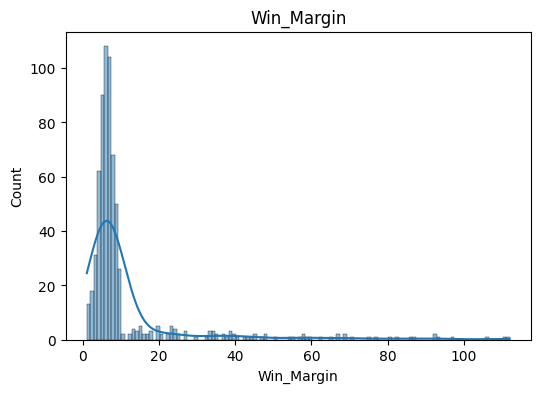

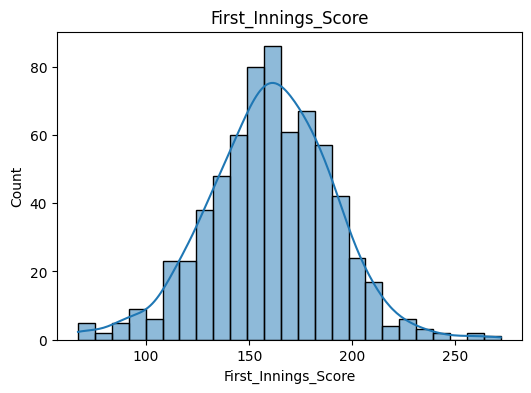

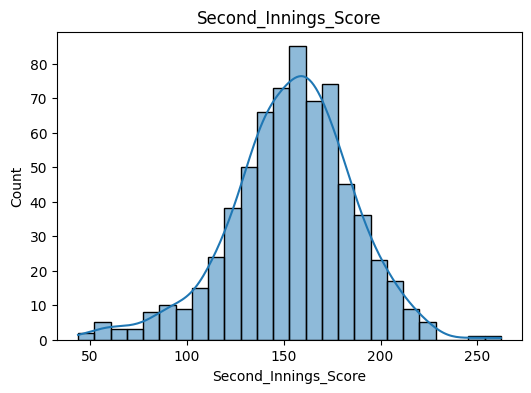

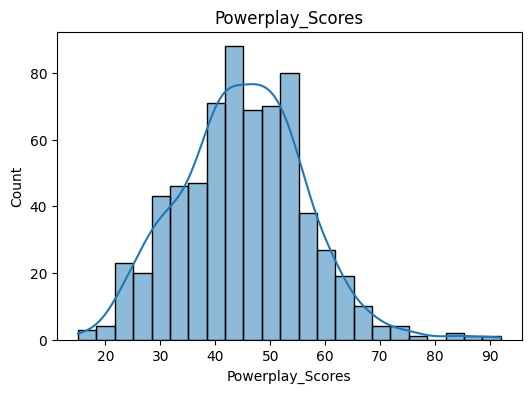

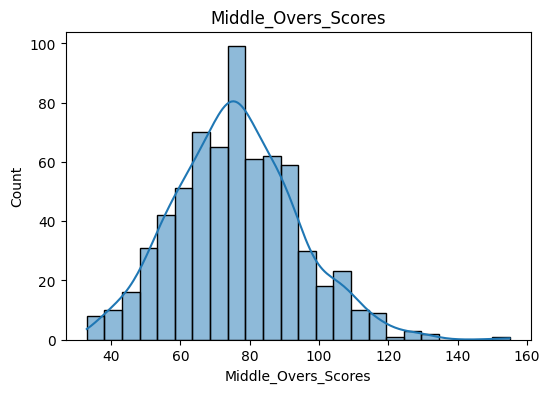

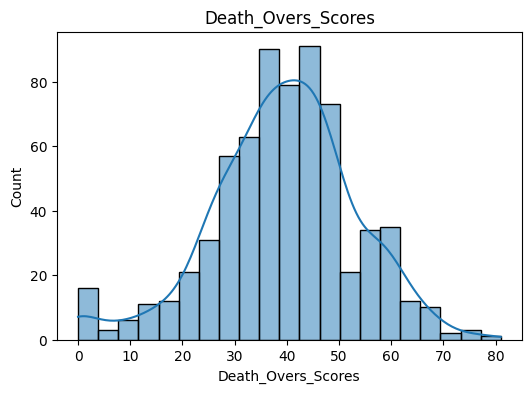

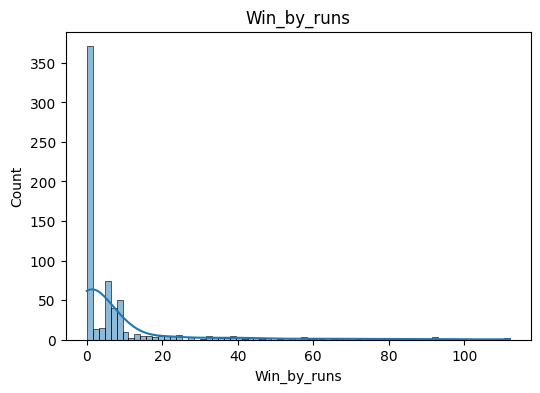

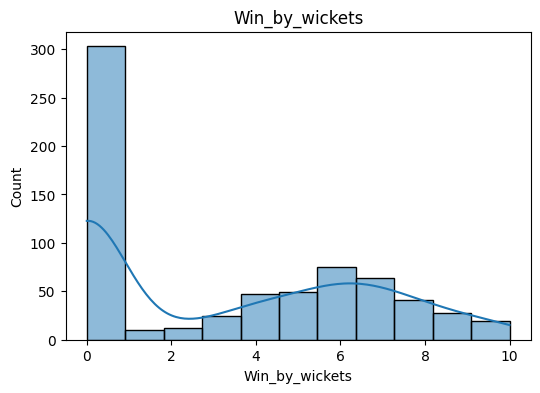

In [41]:
from sys import flags
for col in numeric_col:
  plt.figure(figsize=(6,4,))
  sns.histplot(df[col], kde=True)
  print('\n')
  plt.title(col)
  plt.show()

In [42]:
df['Win_by_runs'] = df['Win_by_runs'].apply(lambda x : np.log(x))
df['Win_by_wickets'] = df['Win_by_wickets'].apply(lambda x : np.log(x))

C:\Users\Prasanna B R\AppData\Local\Temp\ipykernel_14176\471224717.py:1: RuntimeWarning: divide by zero encountered in log
  df['Win_by_runs'] = df['Win_by_runs'].apply(lambda x : np.log(x))
C:\Users\Prasanna B R\AppData\Local\Temp\ipykernel_14176\471224717.py:2: RuntimeWarning: divide by zero encountered in log
  df['Win_by_wickets'] = df['Win_by_wickets'].apply(lambda x : np.log(x))


In [43]:
df['Win_Margin'] = df['Win_Margin'].apply(lambda x : np.log(x))

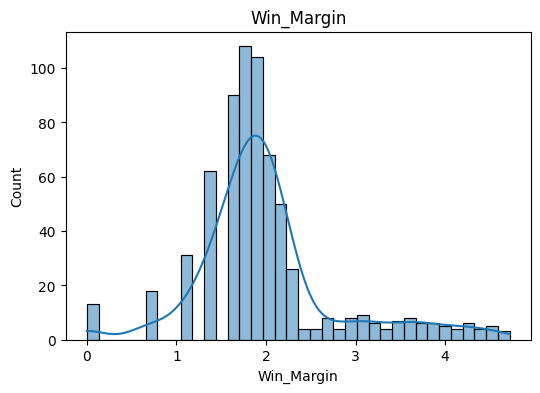

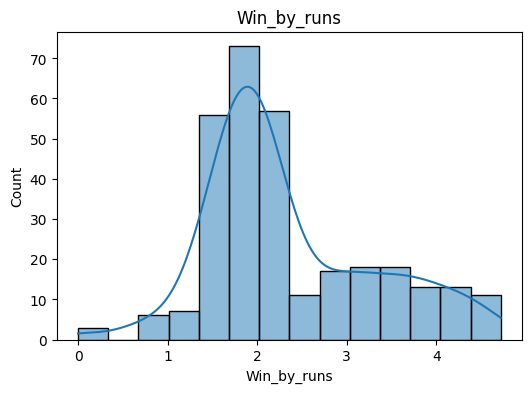

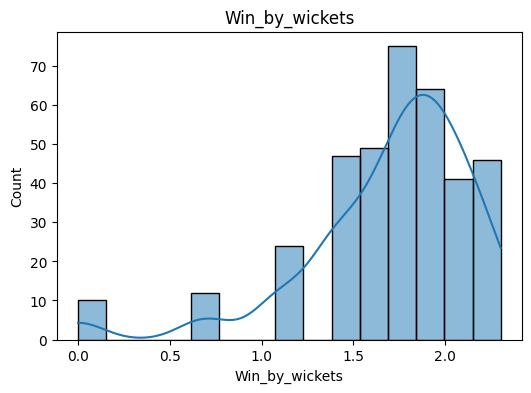

In [44]:
for col in numeric_col:
  if col == 'Win_Margin' or col == 'Win_by_runs' or col == 'Win_by_wickets':
     plt.figure(figsize=(6,4,))
     sns.histplot(df[col], kde=True)
     print('\n')
     plt.title(col)
     plt.show()

In [45]:
df

,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Win_by_runs,Win_by_wickets
1,6 vs 0,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,3.496508,240,207.0,MEK Hussey,53,116,71,3.496508,-inf
2,1 vs 7,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals,runs,2.197225,129,132.0,MF Maharoof,40,66,23,2.197225,-inf
3,5 vs 8,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bengaluru,runs,1.609438,165,166.0,MV Boucher,47,71,47,1.609438,-inf
5,7 vs 6,Sawai Mansingh Stadium,Punjab Kings,bat,Rajasthan Royals,runs,1.791759,166,168.0,SR Watson,54,74,38,1.791759,-inf
7,0 vs 5,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,Chennai Super Kings,wickets,1.791759,208,202.0,ML Hayden,53,105,50,-inf,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4 vs 7,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Rajasthan Royals,field,Rajasthan Royals,wickets,1.945910,196,199.0,SV Samson,46,110,40,-inf,1.945910
1068,2 vs 8,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,wickets,2.197225,200,206.0,WG Jacks,42,106,52,-inf,2.197225
1070,1 vs 3,"Eden Gardens, Kolkata",Delhi Capitals,bat,Kolkata Knight Riders,runs,1.945910,153,157.0,CV Varun,67,61,25,1.945910,-inf
1071,5 vs 4,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,field,Lucknow Super Giants,wickets,1.386294,144,145.0,MP Stoinis,28,78,38,-inf,1.386294


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, 1 to 1072
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Teams                 671 non-null    object 
 1   Venue                 671 non-null    object 
 2   Toss_Winner           671 non-null    object 
 3   Toss_Decision         671 non-null    object 
 4   Match_Winner          671 non-null    object 
 5   Win_Type              671 non-null    object 
 6   Win_Margin            671 non-null    float64
 7   First_Innings_Score   671 non-null    int64  
 8   Second_Innings_Score  671 non-null    float64
 9   Player_of_Match       671 non-null    object 
 10  Powerplay_Scores      671 non-null    int64  
 11  Middle_Overs_Scores   671 non-null    int64  
 12  Death_Overs_Scores    671 non-null    int64  
 13  Win_by_runs           671 non-null    float64
 14  Win_by_wickets        671 non-null    float64
dtypes: float64(4), int64(4), ob

In [47]:
for col in df.columns:
  if df[col].dtypes == 'object':
    print(f'Column = {col}')
  else:
    print(f'No Object values in {col}')

Column = Teams
Column = Venue
Column = Toss_Winner
Column = Toss_Decision
Column = Match_Winner
Column = Win_Type
No Object values in Win_Margin
No Object values in First_Innings_Score
No Object values in Second_Innings_Score
Column = Player_of_Match
No Object values in Powerplay_Scores
No Object values in Middle_Overs_Scores
No Object values in Death_Overs_Scores
No Object values in Win_by_runs
No Object values in Win_by_wickets


In [48]:
from sklearn.preprocessing import LabelEncoder 
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, 1 to 1072
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Teams                 671 non-null    int64  
 1   Venue                 671 non-null    int64  
 2   Toss_Winner           671 non-null    int64  
 3   Toss_Decision         671 non-null    int64  
 4   Match_Winner          671 non-null    int64  
 5   Win_Type              671 non-null    int64  
 6   Win_Margin            671 non-null    float64
 7   First_Innings_Score   671 non-null    int64  
 8   Second_Innings_Score  671 non-null    float64
 9   Player_of_Match       671 non-null    int64  
 10  Powerplay_Scores      671 non-null    int64  
 11  Middle_Overs_Scores   671 non-null    int64  
 12  Death_Overs_Scores    671 non-null    int64  
 13  Win_by_runs           671 non-null    float64
 14  Win_by_wickets        671 non-null    float64
dtypes: float64(4), int64(11)
me

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

In [51]:
df = df.drop(columns=['Win_by_runs', 'Win_by_wickets'])

In [52]:
for col in df.columns:
  if df[col].dtypes == 'objects':
    print(f'Column = {col} : {df[col].unique}')
  else:
    print(f'No Object values in {col}')

No Object values in Teams
No Object values in Venue
No Object values in Toss_Winner
No Object values in Toss_Decision
No Object values in Match_Winner
No Object values in Win_Type
No Object values in Win_Margin
No Object values in First_Innings_Score
No Object values in Second_Innings_Score
No Object values in Player_of_Match
No Object values in Powerplay_Scores
No Object values in Middle_Overs_Scores
No Object values in Death_Overs_Scores


In [53]:
X = df.drop([
    'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score', 'Second_Innings_Score',
    'Player_of_Match', 'Umpire', 'Umpire1', 'Umpire2', 'Powerplay_Scores',
    'Middle_Overs_Scores', 'Death_Overs_Scores', 'Win_by_runs', 'Win_by_wickets'
], axis=1, errors='ignore')

y = df['Match_Winner']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [55]:
X_train.shape

(536, 4)

In [56]:
y_train.shape

(536,)

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

grid = GridSearchCV(XGBClassifier(), params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1_weighted')

In [58]:
y_pred = grid.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')


Accuracy: 0.66


In [60]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.60      0.60      0.60        15
           2       0.67      1.00      0.80         4
           3       0.67      0.78      0.72        18
           4       0.50      0.33      0.40         3
           5       0.70      0.80      0.74        20
           6       0.67      0.46      0.55        13
           7       0.77      0.62      0.69        16
           8       0.67      0.75      0.71        16
           9       0.30      0.30      0.30        10

    accuracy                           0.66       135
   macro avg       0.63      0.63      0.62       135
weighted avg       0.66      0.66      0.65       135



In [61]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[14  0  0  1  0  2  0  0  2  1]
 [ 2  9  1  1  1  0  0  0  1  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  1  1 14  0  0  0  0  0  2]
 [ 0  0  0  0  1  0  0  0  1  1]
 [ 0  0  0  1  0 16  1  0  0  2]
 [ 0  3  0  2  0  1  6  1  0  0]
 [ 1  1  0  1  0  1  0 10  1  1]
 [ 0  0  0  0  0  3  0  1 12  0]
 [ 1  1  0  1  0  0  2  1  1  3]]


In [65]:
# prompt: generate seperate roc curve for team above xgboost model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get the unique classes from the test set
unique_classes = sorted(y_test.unique())

# Binarize the output for each class
y_test_bin = label_binarize(y_test, classes=unique_classes)

# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(len(unique_classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    class_name = list(team_label_map.keys())[list(team_label_map.values()).index(unique_classes[i])]
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Team')
plt.legend(loc="lower right")
plt.show()


NameError: name 'model' is not defined

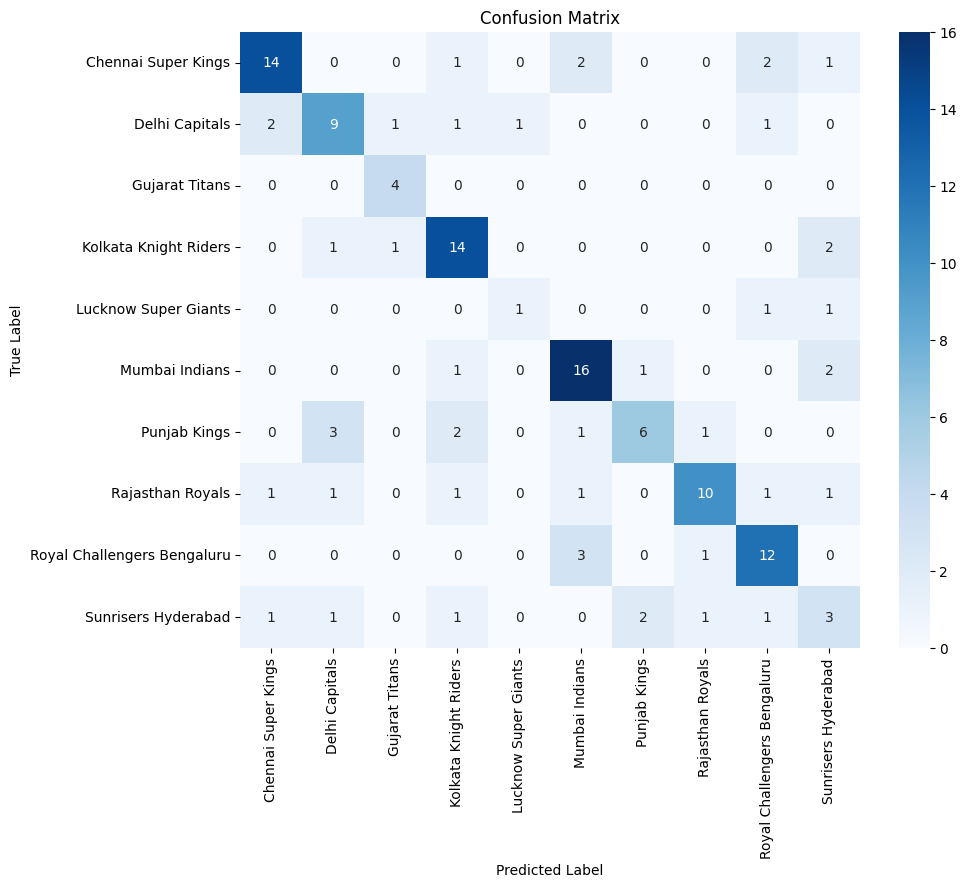

In [63]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=team_label_map.keys(), yticklabels=team_label_map.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
import joblib

model_folder = r"D:\github\NEW2-main\NEW2-main"
os.makedirs(model_folder, exist_ok=True)

model_filename = os.path.join(model_folder, 'xgboost_ipl_winner_model.pkl')
joblib.dump(model, model_filename)

print(f"Model saved successfully to: {model_filename}")


Model saved successfully to: D:\github\NEW2-main\NEW2-main\xgboost_ipl_winner_model.pkl
